Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  44898 non-null  object
 1   text     44898 non-null  object
 2   label    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None

Dataset Description:
              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

Class Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


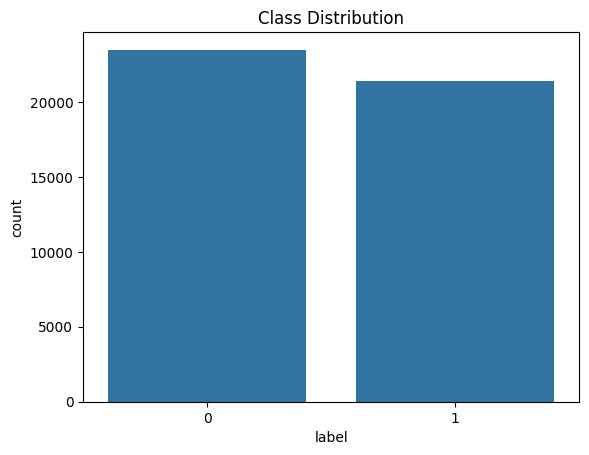

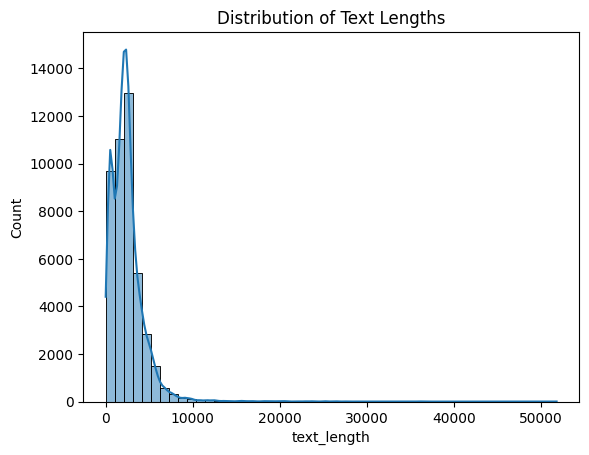

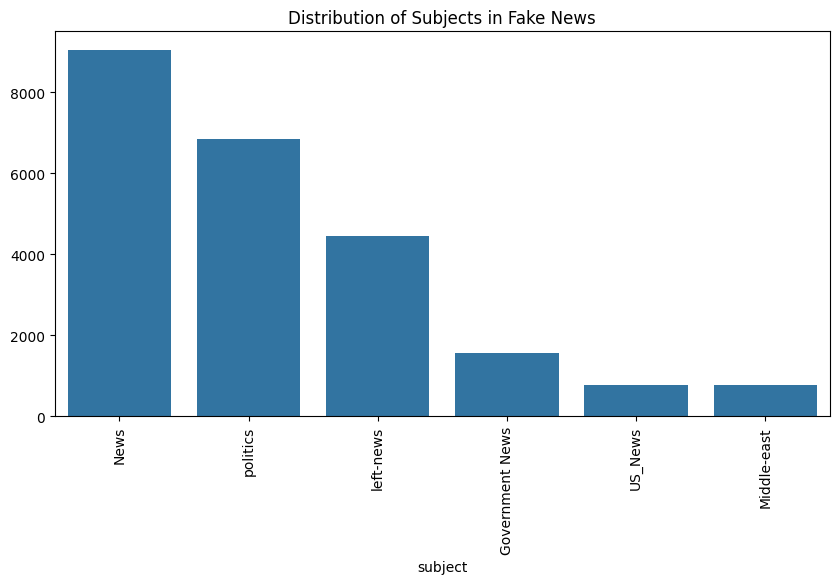

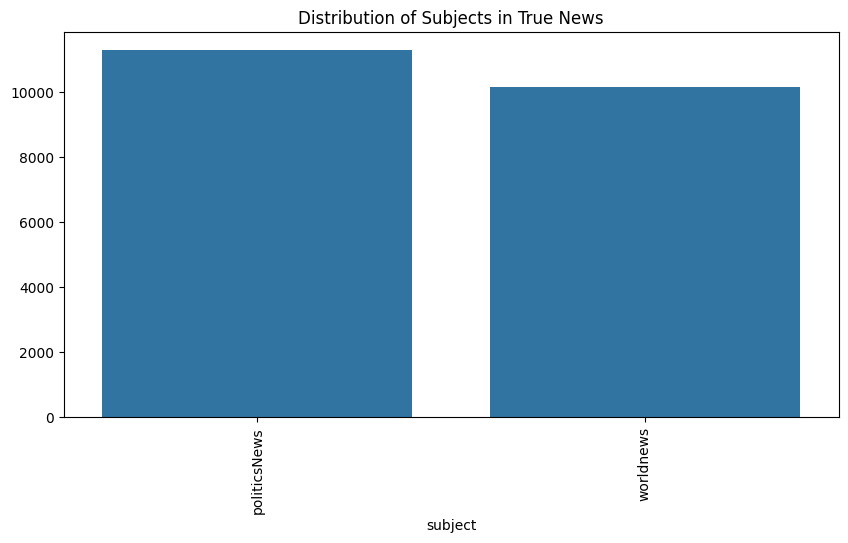

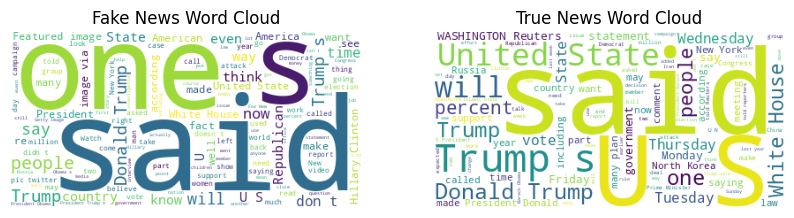

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
fake_df = pd.read_csv('fake.csv')
true_df = pd.read_csv('true.csv')

# Add labels: 0 for fake, 1 for true
fake_df['label'] = 0
true_df['label'] = 1

# Combine datasets
data = pd.concat([fake_df, true_df], ignore_index=True)
data = data[['subject', 'text', 'label']] # Assuming 'subject' column exists

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Basic statistics and structure
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())
print("\nClass Distribution:")
print(data['label'].value_counts())

# Plot class distribution
sns.countplot(x=data['label'])
plt.title("Class Distribution")
plt.show()

# Text length analysis
data['text_length'] = data['text'].apply(len)
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.show()

# Distribution of subjects in fake news
fake_subject_counts = fake_df['subject'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values)
plt.title('Distribution of Subjects in Fake News')
plt.xticks(rotation=90)
plt.show()

# Distribution of subjects in true news
true_subject_counts = true_df['subject'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values)
plt.title('Distribution of Subjects in True News')
plt.xticks(rotation=90)
plt.show()

# Word cloud visualization
from wordcloud import WordCloud

fake_text = " ".join(fake_df['text'].astype(str))
true_text = " ".join(true_df['text'].astype(str))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(fake_text))
plt.title("Fake News Word Cloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(true_text))
plt.title("True News Word Cloud")
plt.axis("off")

plt.show()
